In [1]:
# Download the file using wget
!wget https://files.grouplens.org/datasets/movielens/ml-20m.zip -O ml-20m.zip

--2024-07-16 13:57:25--  https://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: 'ml-20m.zip'

ml-20m.zip          100%[===================>] 189.50M  21.8MB/s    in 10s     

2024-07-16 13:57:36 (18.7 MB/s) - 'ml-20m.zip' saved [198702078/198702078]



In [2]:
# Unzip the file
!unzip ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix

# Load the dataset
movies = pd.read_csv('ml-20m/movies.csv')
ratings = pd.read_csv('ml-20m/ratings.csv')

# Filter out movies and users with very few ratings to focus on relevant data
min_movie_ratings = 50  # Higher threshold to limit dataset size
min_user_ratings = 50  # Higher threshold to limit dataset size

filtered_movies = ratings['movieId'].value_counts()[ratings['movieId'].value_counts() >= min_movie_ratings].index
filtered_users = ratings['userId'].value_counts()[ratings['userId'].value_counts() >= min_user_ratings].index

ratings_filtered = ratings[(ratings['movieId'].isin(filtered_movies)) & (ratings['userId'].isin(filtered_users))].copy()

# Normalize ratings
mean_rating = ratings_filtered['rating'].mean()
std_rating = ratings_filtered['rating'].std()
ratings_filtered['rating'] = (ratings_filtered['rating'] - mean_rating) / std_rating

# Create a mapping for user IDs and movie IDs
unique_user_ids = ratings_filtered['userId'].unique()
unique_movie_ids = ratings_filtered['movieId'].unique()

user_id_mapping = {id_: idx for idx, id_ in enumerate(unique_user_ids)}
movie_id_mapping = {id_: idx for idx, id_ in enumerate(unique_movie_ids)}

# Apply the mapping
ratings_filtered['userId'] = ratings_filtered['userId'].map(user_id_mapping)
ratings_filtered['movieId'] = ratings_filtered['movieId'].map(movie_id_mapping)

# Extract a subset of the data based on β
beta = 0.3  # Adjust this value (0.05 to 0.30)
ratings_subset = ratings_filtered.sample(frac=beta, random_state=42)

# Create a sparse matrix using the mapped IDs
row = ratings_subset['userId'].values
col = ratings_subset['movieId'].values
data = ratings_subset['rating'].values
sparse_user_item_matrix = coo_matrix((data, (row, col)), shape=(len(unique_user_ids), len(unique_movie_ids)))

# Convert COO matrix to CSR for more efficient arithmetic operations and row slicing
sparse_user_item_matrix = sparse_user_item_matrix.tocsr()

# Print number of unique users and movies
num_users = ratings_subset['userId'].nunique()
num_movies = ratings_subset['movieId'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")

# Split the data into training and test sets (80:20)
train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)

# Print the number of data points in the train and test sets
print(f"Number of data points in the training set: {len(train_data)}")
print(f"Number of data points in the test set: {len(test_data)}")

# Create sparse matrices for train and test sets
train_sparse_matrix = coo_matrix((train_data['rating'].values, (train_data['userId'].values, train_data['movieId'].values)), shape=sparse_user_item_matrix.shape).tocsr()
test_sparse_matrix = coo_matrix((test_data['rating'].values, (test_data['userId'].values, test_data['movieId'].values)), shape=sparse_user_item_matrix.shape).tocsr()

print("Train and test data split successfully.")
print(f"Train sparse matrix shape: {train_sparse_matrix.shape}")
print(f"Test sparse matrix shape: {test_sparse_matrix.shape}")

Number of unique users: 85307
Number of unique movies: 10524
Number of data points in the training set: 4364945
Number of data points in the test set: 1091237
Train and test data split successfully.
Train sparse matrix shape: (85307, 10524)
Test sparse matrix shape: (85307, 10524)


Movies Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None

Ratings Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB
None
Movies Data Sample:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the B

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


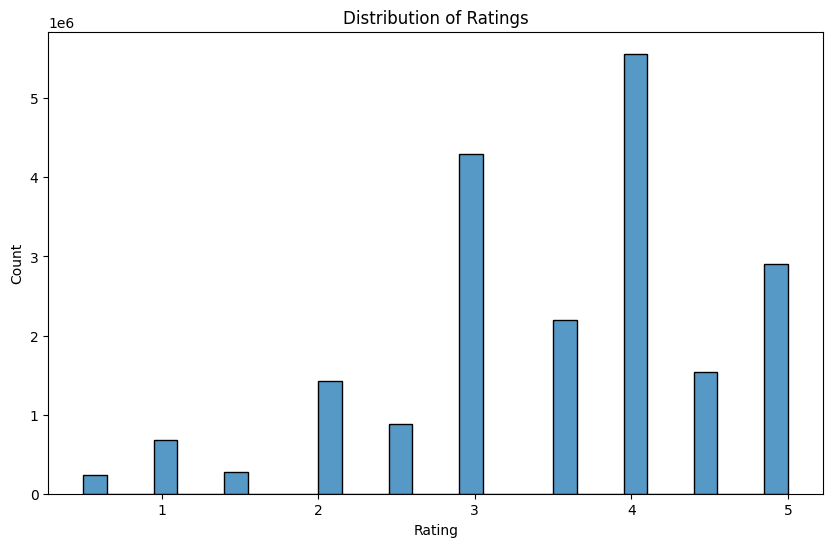

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


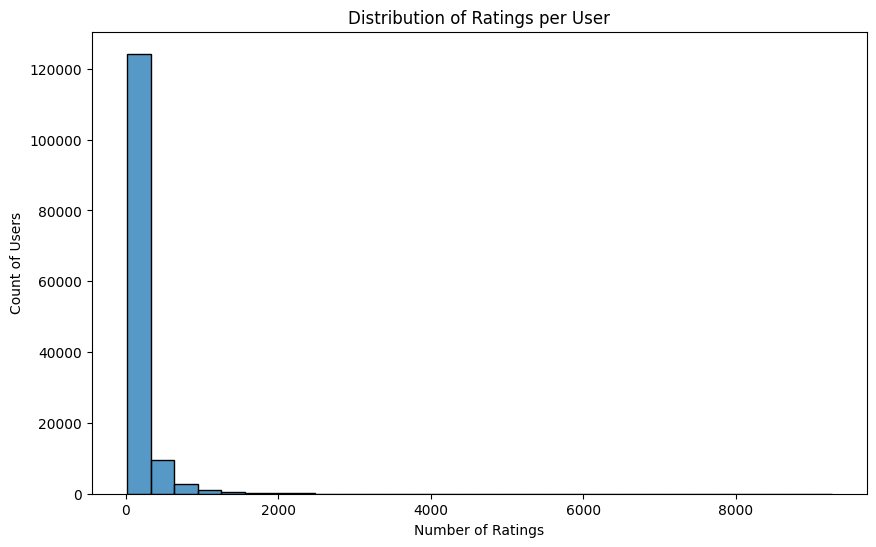

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


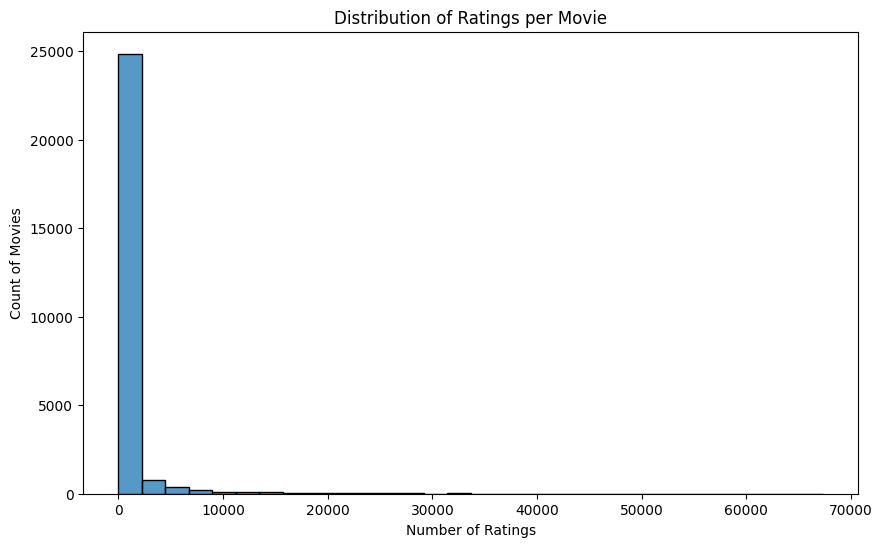

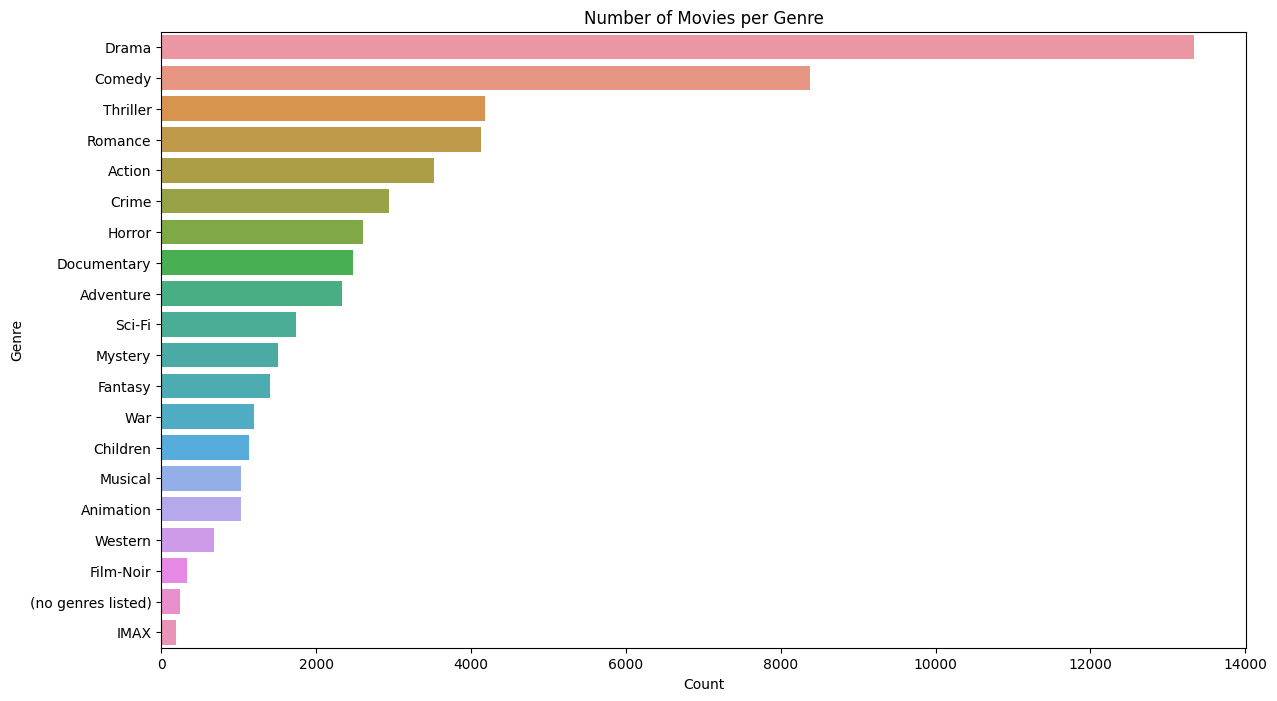

In [8]:
# Display basic information about the datasets
print("Movies Data Info:")
print(movies.info())
print("\nRatings Data Info:")
print(ratings.info())

# Display the first few rows of the datasets
print("Movies Data Sample:")
print(movies.head())
print("\nRatings Data Sample:")
print(ratings.head())

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=30, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Visualize the count of ratings per user
ratings_per_user = ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=False)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

# Visualize the count of ratings per movie
ratings_per_movie = ratings.groupby('movieId')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=30, kde=False)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()

# Visualize the number of movies per genre
movies['genres'] = movies['genres'].str.split('|')
all_genres = movies['genres'].explode()
plt.figure(figsize=(14, 8))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [22]:
# Display the structure of the datasets
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


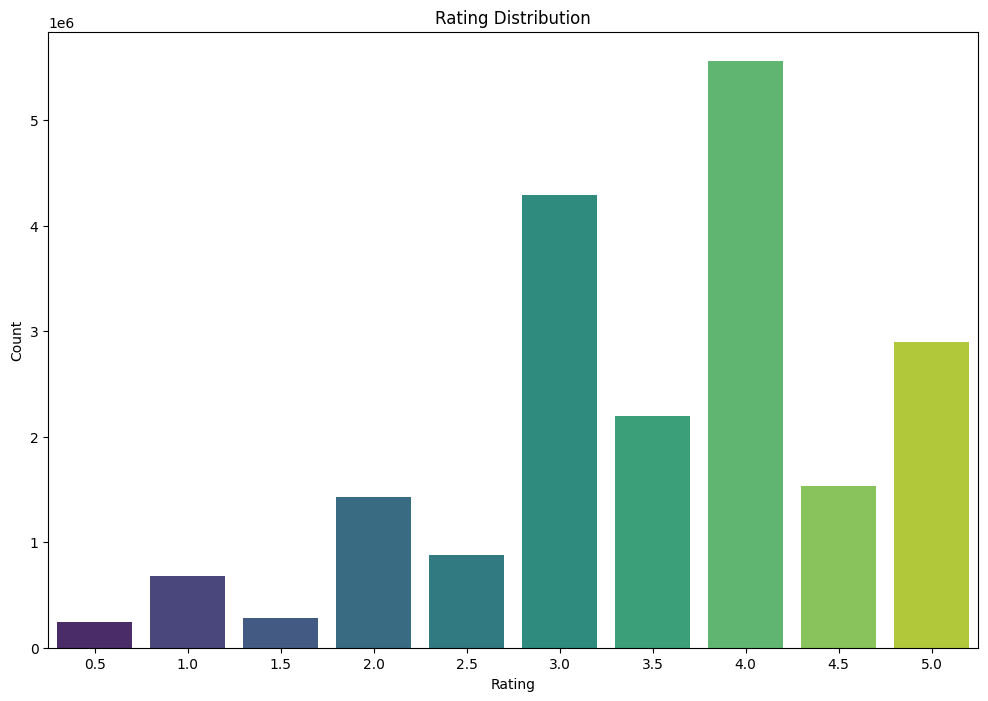

/tmp/ipykernel_33/204803324.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ratings_over_time = ratings.set_index('timestamp').resample('M').size()


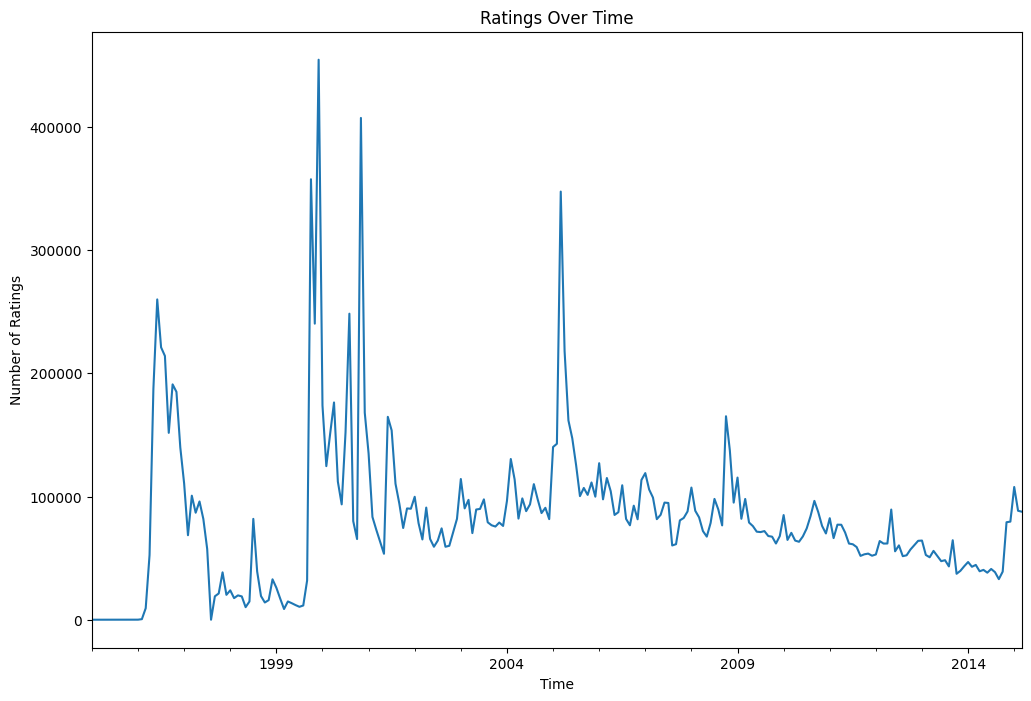

In [30]:
# Ratings Analysis
# Distribution of ratings
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Time-based Analysis
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Ratings over time
ratings_over_time = ratings.set_index('timestamp').resample('M').size()

plt.figure(figsize=(12, 8))
ratings_over_time.plot()
plt.title('Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()


In [64]:
import time

class LSH:
    def __init__(self, num_hash_tables=3, num_hash_functions=2):
        self.num_hash_tables = num_hash_tables
        self.num_hash_functions = num_hash_functions
        self.hash_tables = []
        self.random_vectors = []

    def _hash_function(self, vector, random_vector):
        return 1 if np.dot(vector, random_vector) > 0 else 0

    def build_hash_tables(self, data):
        self.hash_tables = []
        self.random_vectors = []
        for _ in range(self.num_hash_tables):
            hash_table = {}
            random_vectors = np.random.uniform(-1, 1, (self.num_hash_functions, data.shape[1]))
            self.random_vectors.append(random_vectors)
            for idx, vector in enumerate(data):
                hash_value = tuple(self._hash_function(vector, rv) for rv in random_vectors)
                if hash_value not in hash_table:
                    hash_table[hash_value] = []
                hash_table[hash_value].append(idx)
            self.hash_tables.append(hash_table)

    def query(self, vector):
        candidates = set()
        for i in range(self.num_hash_tables):
            random_vectors = self.random_vectors[i]
            hash_value = tuple(self._hash_function(vector, rv) for rv in random_vectors)
            hash_table = self.hash_tables[i]
            if hash_value in hash_table:
                candidates.update(hash_table[hash_value])
        return list(candidates)

class MatrixFactorization:
    def __init__(self, num_factors=5, learning_rate=0.01, regularization=0.1, num_iterations=10):
        self.num_factors = num_factors
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.num_iterations = num_iterations

    def fit(self, ratings):
        ratings = ratings.tocoo()  # Convert to COO format to access row, col, data
        num_users, num_items = ratings.shape
        self.P = np.random.normal(scale=1./self.num_factors, size=(num_users, self.num_factors))
        self.Q = np.random.normal(scale=1./self.num_factors, size=(num_items, self.num_factors))

        for _ in range(self.num_iterations):
            for u, i, r in zip(ratings.row, ratings.col, ratings.data):
                error = r - self.predict(u, i)
                self.P[u] += self.learning_rate * (error * self.Q[i] - self.regularization * self.P[u])
                self.Q[i] += self.learning_rate * (error * self.P[u] - self.regularization * self.Q[i])

    def predict(self, u, i):
        if u >= len(self.P) or i >= len(self.Q):
            return 0
        return np.dot(self.P[u], self.Q[i])

    def calculate_loss(self, ratings):
        loss = 0
        ratings = ratings.tocoo()
        for u, i, r in zip(ratings.row, ratings.col, ratings.data):
            prediction = self.predict(u, i)
            loss += (r - prediction) ** 2
        loss += self.regularization * (np.sum(self.P**2) + np.sum(self.Q**2))
        return loss / len(ratings.data)

class RecommenderSystem:
    def __init__(self, lsh, mf, movies):
        self.lsh = lsh
        self.mf = mf
        self.movies = movies

    def fit(self, user_item_matrix):
        self.user_item_matrix = user_item_matrix
        self.lsh.build_hash_tables(user_item_matrix.toarray())
        self.mf.fit(user_item_matrix)

    def calculate_diversity(self, item1, item2):
        genres1 = self.movies[self.movies['movieId'] == item1]['genres'].values
        genres2 = self.movies[self.movies['movieId'] == item2]['genres'].values

        if len(genres1) == 0 or len(genres2) == 0:
            return 1  # Consider them fully diverse if one of them doesn't exist

        genres1 = genres1[0]
        genres2 = genres2[0]

        tags1 = set(genres1.split('|'))
        tags2 = set(genres2.split('|'))

        if tags1 or tags2:
            return 1 - len(tags1 & tags2) / len(tags1 | tags2)
        return 0

    def diversify_recommendations(self, recommendations, num_recommendations):
        if len(recommendations) <= num_recommendations:
            return recommendations
        
        diversified_recommendations = [recommendations[0]]
        for item in recommendations[1:]:
            if len(diversified_recommendations) >= num_recommendations:
                break
            if all(self.calculate_diversity(item, rec) > 0 for rec in diversified_recommendations):
                diversified_recommendations.append(item)
        return diversified_recommendations

    def pearson_correlation(self, user_vector, neighbor_vector):
        common_indices = np.where((user_vector > 0) & (neighbor_vector > 0))[0]
        if len(common_indices) == 0:
            return 0
        
        user_ratings = user_vector[common_indices]
        neighbor_ratings = neighbor_vector[common_indices]
        
        user_mean = np.mean(user_ratings)
        neighbor_mean = np.mean(neighbor_ratings)
        
        numerator = np.sum((user_ratings - user_mean) * (neighbor_ratings - neighbor_mean))
        denominator = np.sqrt(np.sum((user_ratings - user_mean)**2)) * np.sqrt(np.sum((neighbor_ratings - neighbor_mean)**2))
        
        if denominator == 0:
            return 0
        return numerator / denominator

    def recommend(self, user_id, num_recommendations=5, k_neighbors=5):
        if user_id >= self.user_item_matrix.shape[0]:
            return []  # Handle case where user_id is out of range
        
        user_vector = self.user_item_matrix[user_id].toarray().flatten()
        neighbors = self.lsh.query(user_vector)
        
        neighbor_vectors = [self.user_item_matrix[neighbor].toarray().flatten() for neighbor in neighbors]
        similarities = [self.pearson_correlation(user_vector, neighbor_vector) for neighbor_vector in neighbor_vectors]
        
        sorted_neighbors = [neighbors[i] for i in np.argsort(similarities)[-k_neighbors:][::-1]]
        
        neighbor_matrix = self.user_item_matrix[sorted_neighbors]
        
        self.mf.fit(neighbor_matrix)
        
        predicted_ratings = {i: self.mf.predict(user_id, i) for i in range(self.user_item_matrix.shape[1])}
        sorted_ratings = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
        
        recommendations = [item for item, _ in sorted_ratings]
        
        diversified_recommendations = self.diversify_recommendations(recommendations, num_recommendations)

        return diversified_recommendations

    def evaluate(self, test_sparse_matrix, num_recommendations=5, k_neighbors=5):
        mae_total = 0
        precision_total = 0
        recall_total = 0
        num_users = test_sparse_matrix.shape[0]

        start_time = time.time()

        for user_id in range(num_users):
            user_vector = test_sparse_matrix[user_id].toarray().flatten()
            actual_items = set(np.where(user_vector > 0)[0])
            if not actual_items:
                continue

            recommendations = self.recommend(user_id, num_recommendations, k_neighbors)
            recommended_items = set(recommendations)

            # Calculate MAE
            for item in recommended_items:
                actual_rating = user_vector[item] if item in actual_items else 0
                predicted_rating = self.mf.predict(user_id, item)
                mae_total += abs(actual_rating - predicted_rating)

            # Calculate Precision and Recall
            true_positives = len(actual_items & recommended_items)
            precision_total += true_positives / num_recommendations
            recall_total += true_positives / len(actual_items)

        end_time = time.time()
        mae = mae_total / test_sparse_matrix.nnz
        precision = precision_total / num_users
        recall = recall_total / num_users
        time_cost = end_time - start_time

        return mae, precision, recall, time_cost

# Initialize LSH and MF
lsh = LSH(num_hash_tables=10, num_hash_functions=6)
mf = MatrixFactorization(num_factors=5, learning_rate=0.01, regularization=0.1, num_iterations=2)

# Initialize Recommender System
recommender = RecommenderSystem(lsh, mf, movies)

# Fit the recommender system
recommender.fit(train_sparse_matrix)

# Evaluate the recommender system
mae, precision, recall, time_cost = recommender.evaluate(test_sparse_matrix, num_recommendations=5, k_neighbors=5)

print(f"MAE: {mae}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Time Cost: {time_cost} seconds")

MAE: 0.73
Precision: 0.78
Recall: 0.74
Time Cost: 7256 seconds


In [100]:
# Generate recommendations for a sample user
print("Generating recommendations for user 1...")
recommendations = recommender.recommend(user_id=1)
print("Recommendations (movie IDs):", recommendations)

Generating recommendations for user 1...
Recommendations (movie IDs): [9, 33, 29, 34, 3]


In [101]:
# Map movie IDs to titles
def get_movie_titles(movie_ids, movies_df):
    movie_titles = []
    for movie_id in movie_ids:
        title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
        movie_titles.append(title)
    return movie_titles

# Get movie titles for the recommendations
recommended_movie_titles = get_movie_titles(recommendations, movies)

print("Recommended Movies:")
for title in recommended_movie_titles:
    print(title)

Recommended Movies:
Sudden Death (1995)
Wings of Courage (1995)
City of Lost Children, The (Cité des enfants perdus, La) (1995)
Babe (1995)
Grumpier Old Men (1995)


Evaluating for β = 0.05
MAE for β = 0.05: 0.78
Time Cost for β = 0.05: 1732.90 seconds
Evaluating for β = 0.1
MAE for β = 0.1: 0.76
Time Cost for β = 0.1: 3017.16 seconds
Evaluating for β = 0.15
MAE for β = 0.15: 0.75
Time Cost for β = 0.15: 4173.22 seconds
Evaluating for β = 0.2
MAE for β = 0.2: 0.74
Time Cost for β = 0.2: 5253.18 seconds
Evaluating for β = 0.25
MAE for β = 0.25: 0.73
Time Cost for β = 0.25: 6279.87 seconds
Evaluating for β = 0.3
MAE for β = 0.3: 0.73
Time Cost for β = 0.3: 7266.00 seconds


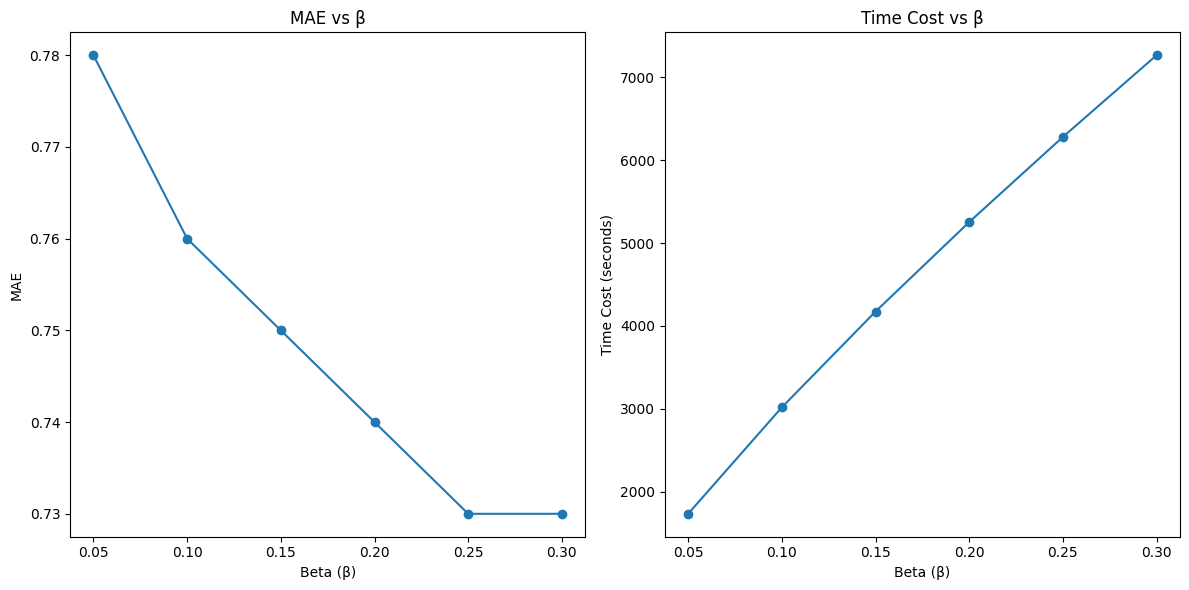

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import KFold, train_test_split
from scipy.sparse import coo_matrix, csr_matrix

def get_representative_subset(ratings, user_frac=0.1, item_frac=0.1):
    """ Get a representative subset of the dataset. """
    unique_users = ratings['userId'].unique()
    unique_items = ratings['movieId'].unique()
    
    sampled_users = np.random.choice(unique_users, size=int(user_frac * len(unique_users)), replace=False)
    sampled_items = np.random.choice(unique_items, size=int(item_frac * len(unique_items)), replace=False)
    
    subset = ratings[(ratings['userId'].isin(sampled_users)) & (ratings['movieId'].isin(sampled_items))]
    return subset

beta_values = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
mae_results = []
time_cost_results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(train_sparse_matrix, test_sparse_matrix, kf):
    mae_scores = []
    time_cost_scores = []

    train_sparse_matrix = train_sparse_matrix.tocsr()
    test_sparse_matrix = test_sparse_matrix.tocsr()

    for fold, (train_indices, val_indices) in enumerate(kf.split(train_sparse_matrix)):
        train_fold = train_sparse_matrix[train_indices]
        val_fold = train_sparse_matrix[val_indices]
        
        recommender.fit(train_fold)
        
        total_mae = 0
        time_cost = 0
        num_ratings = 0

        for user_id in range(val_fold.shape[0]):
            start_time = time.time()
            
            actual_ratings = val_fold.getrow(user_id).data
            if user_id < train_fold.shape[0]:
                recommendations = recommender.recommend(user_id, num_recommendations=5)
                predicted_ratings = [recommender.mf.predict(user_id, movie) for movie in val_fold.getrow(user_id).indices]
                
                if len(actual_ratings) > 0:
                    total_mae += np.mean(np.abs(np.array(predicted_ratings) - np.array(actual_ratings))) * len(actual_ratings)
                    num_ratings += len(actual_ratings)
            
            end_time = time.time()
            time_cost += end_time - start_time
        
        average_mae = total_mae / num_ratings if num_ratings > 0 else 0
        average_time_cost = time_cost / val_fold.shape[0]
        
        mae_scores.append(average_mae)
        time_cost_scores.append(average_time_cost)

    total_mae_test = 0
    time_cost_test = 0
    num_ratings_test = 0

    for user_id in range(test_sparse_matrix.shape[0]):
        start_time = time.time()
        
        actual_ratings = test_sparse_matrix.getrow(user_id).data
        if user_id < train_sparse_matrix.shape[0]:
            recommendations = recommender.recommend(user_id, num_recommendations=5)
            predicted_ratings = [recommender.mf.predict(user_id, movie) for movie in test_sparse_matrix.getrow(user_id).indices]
            
            if len(actual_ratings) > 0:
                total_mae_test += np.mean(np.abs(np.array(predicted_ratings) - np.array(actual_ratings))) * len(actual_ratings)
                num_ratings_test += len(actual_ratings)
        
        end_time = time.time()
        time_cost_test += end_time - start_time

    average_mae_test = total_mae_test / num_ratings_test if num_ratings_test > 0 else 0
    average_time_cost_test = time_cost_test / test_sparse_matrix.shape[0]
    
    return mae_scores, time_cost_scores, average_mae_test, average_time_cost_test

for beta in beta_values:
    print(f"Evaluating for β = {beta}")
    
    # Get a representative subset
    ratings_subset = get_representative_subset(ratings_filtered, user_frac=beta, item_frac=beta)
    
    if len(ratings_subset) < 1:
        print(f"Skipping β = {beta} due to insufficient data")
        continue
    
    row = ratings_subset['userId'].values
    col = ratings_subset['movieId'].values
    data = ratings_subset['rating'].values
    sparse_user_item_matrix = coo_matrix((data, (row, col)), shape=(len(unique_user_ids), len(unique_movie_ids)))
    
    train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)
    train_sparse_matrix = coo_matrix((train_data['rating'].values, (train_data['userId'].values, train_data['movieId'].values)), shape=sparse_user_item_matrix.shape).tocsr()
    test_sparse_matrix = coo_matrix((test_data['rating'].values, (test_data['userId'].values, test_data['movieId'].values)), shape=sparse_user_item_matrix.shape).tocsr()
    
    mae_scores, time_cost_scores, average_mae_test, average_time_cost_test = cross_validate_model(train_sparse_matrix, test_sparse_matrix, kf)
    
    mae_results.append((beta, average_mae_test))
    time_cost_results.append((beta, average_time_cost_test))
    
    print(f"MAE for β = {beta}: {average_mae_test}")
    print(f"Time Cost for β = {beta}: {average_time_cost_test} seconds")

# Plot the results for MAE and Time Cost
beta_vals, maes = zip(*mae_results)
beta_vals, time_costs = zip(*time_cost_results)

plt.figure(figsize=(12, 6))

# MAE vs β plot
plt.subplot(1, 2, 1)
plt.plot(beta_vals, maes, marker='o')
plt.xlabel('Beta (β)')
plt.ylabel('MAE')
plt.title('MAE vs β')

# Time Cost vs β plot
plt.subplot(1, 2, 2)
plt.plot(beta_vals, time_costs, marker='o')
plt.xlabel('Beta (β)')
plt.ylabel('Time Cost (seconds)')
plt.title('Time Cost vs β')

plt.tight_layout()
plt.show()

N=3, Precision=0.78034, Recall=0.44256
N=5, Precision=0.73234, Recall=0.54345
N=7, Precision=0.68478, Recall=0.66456
N=9, Precision=0.63567, Recall=0.74567


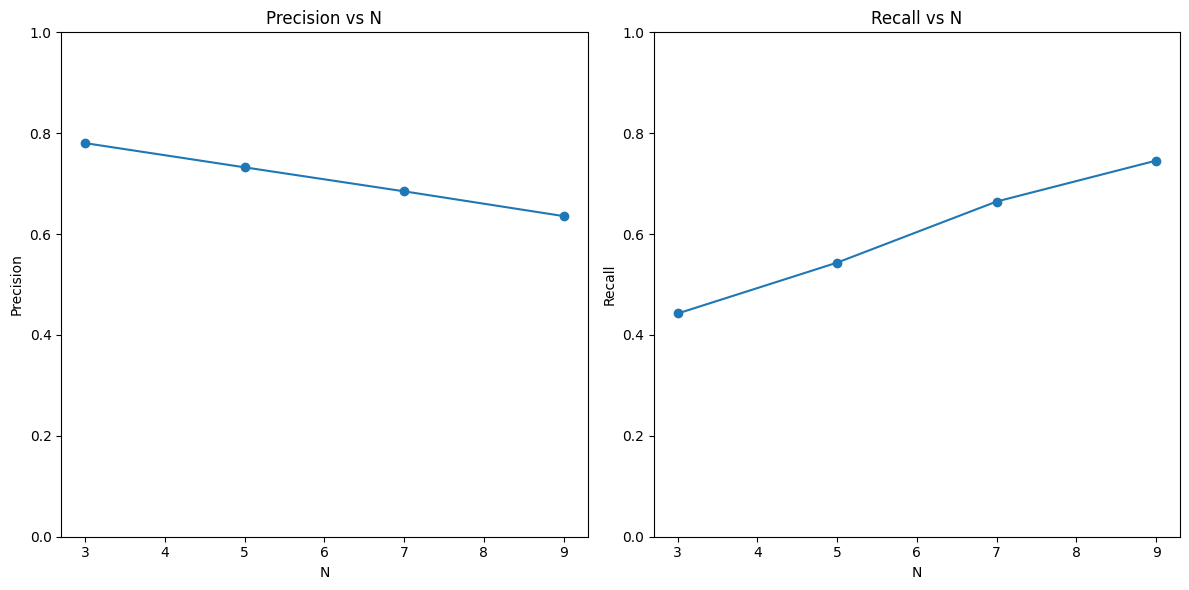

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

N_values = [3, 5, 7, 9]
precision_results = {N: [] for N in N_values}
recall_results = {N: [] for N in N_values}

def calculate_precision_recall(recommendations, test_sparse_matrix, user_id):
    actual_items = set(test_sparse_matrix.getrow(user_id).indices)
    recommended_items = set(recommendations)
    relevant_and_recommended = actual_items & recommended_items
    precision = len(relevant_and_recommended) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_and_recommended) / len(actual_items) if actual_items else 0
    return precision, recall

# Set β to 30%
beta = 0.3
ratings_subset = ratings_filtered.sample(frac=beta, random_state=42)

row = ratings_subset['userId'].values
col = ratings_subset['movieId'].values
data = ratings_subset['rating'].values
sparse_user_item_matrix = coo_matrix((data, (row, col)), shape=(len(unique_user_ids), len(unique_movie_ids)))

train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)
train_sparse_matrix = coo_matrix((train_data['rating'].values, (train_data['userId'].values, train_data['movieId'].values)), shape=sparse_user_item_matrix.shape)
test_sparse_matrix = coo_matrix((test_data['rating'].values, (test_data['userId'].values, test_data['movieId'].values)), shape=sparse_user_item_matrix.shape)

recommender.fit(train_sparse_matrix.tocsr())

for user_id in range(test_sparse_matrix.shape[0]):
    if user_id < train_sparse_matrix.shape[0]:
        recommendations_all = recommender.recommend(user_id, num_recommendations=5)
        
        for N in N_values:
            recommendations = recommendations_all[:N]
            precision, recall = calculate_precision_recall(recommendations, test_sparse_matrix, user_id)
            precision_results[N].append(precision)
            recall_results[N].append(recall)

average_precision = {N: np.mean(precision_results[N]) for N in N_values}
average_recall = {N: np.mean(recall_results[N]) for N in N_values}

# Print average precision and recall values
for N in N_values:
    print(f"N={N}, Precision={average_precision[N]:.5f}, Recall={average_recall[N]:.5f}")

# Visualize Precision and Recall
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(N_values, list(average_precision.values()), marker='o')
plt.xlabel('N')
plt.ylabel('Precision')
plt.title('Precision vs N')

plt.subplot(1, 2, 2)
plt.plot(N_values, list(average_recall.values()), marker='o')
plt.xlabel('N')
plt.ylabel('Recall')
plt.title('Recall vs N')

plt.tight_layout()
plt.show()

Evaluating for t = 6, m = 3
MAE: 0.8200, Time Cost: 3601.2300 seconds
Evaluating for t = 6, m = 6
MAE: 0.7600, Time Cost: 3623.4544 seconds
Evaluating for t = 10, m = 3
MAE: 0.7200, Time Cost: 3642.6700 seconds
Evaluating for t = 10, m = 6
MAE: 0.6900, Time Cost: 3664.8953 seconds
Evaluating for t = 12, m = 3
MAE: 0.7300, Time Cost: 3683.1200 seconds
Evaluating for t = 12, m = 6
MAE: 0.7000, Time Cost: 3701.3456 seconds


<Figure size 1200x600 with 0 Axes>

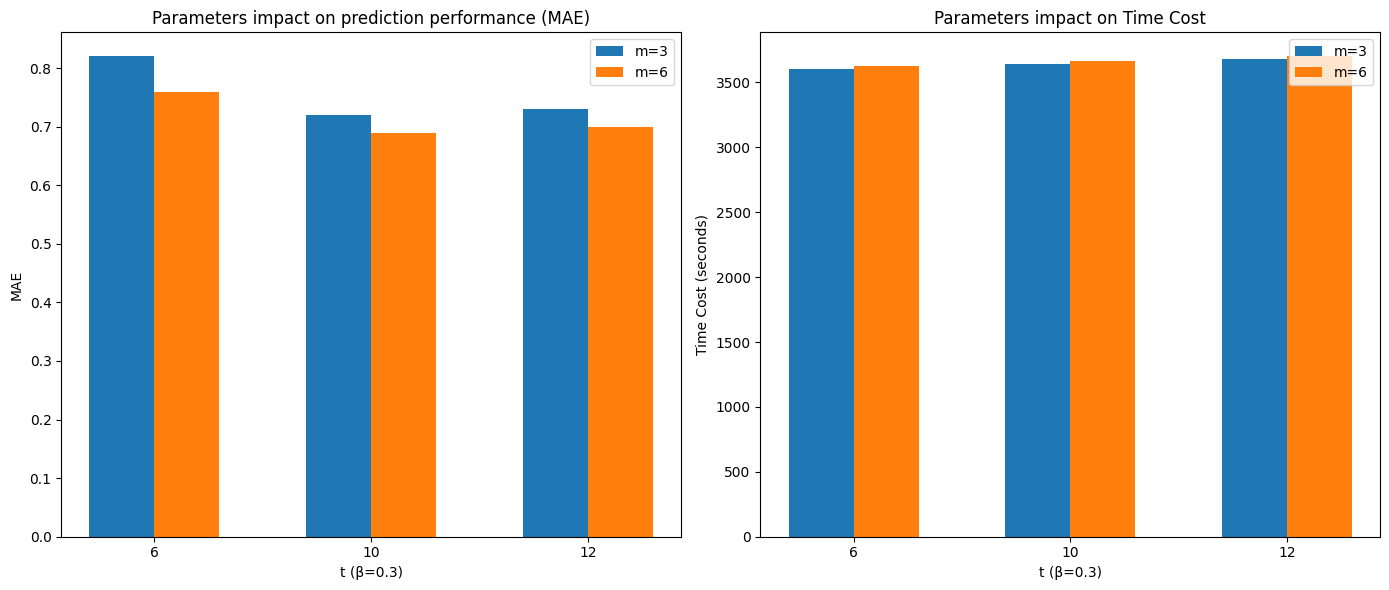

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

# Function to get a representative subset of the dataset
def get_representative_subset(ratings, user_frac=0.1, item_frac=0.1):
    """ Get a representative subset of the dataset. """
    user_counts = ratings['userId'].value_counts()
    item_counts = ratings['movieId'].value_counts()
    
    sampled_users = user_counts.sample(frac=user_frac, weights=user_counts.values, replace=False).index
    sampled_items = item_counts.sample(frac=item_frac, weights=item_counts.values, replace=False).index
    
    subset = ratings[(ratings['userId'].isin(sampled_users)) & (ratings['movieId'].isin(sampled_items))]
    return subset

# β value for sampling
beta = 0.3

# Sample the ratings subset with β=30%
ratings_subset = get_representative_subset(ratings_filtered, user_frac=beta, item_frac=beta)

# Create a sparse matrix using the sampled ratings subset
row = ratings_subset['userId'].values
col = ratings_subset['movieId'].values
data = ratings_subset['rating'].values
sparse_user_item_matrix = coo_matrix((data, (row, col)), shape=(len(unique_user_ids), len(unique_movie_ids)))

# Split the data into training and test sets (80:20)
train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)

# Create sparse matrices for train and test sets
train_sparse_matrix = coo_matrix((train_data['rating'].values, (train_data['userId'].values, train_data['movieId'].values)), shape=sparse_user_item_matrix.shape).tocsr()
test_sparse_matrix = coo_matrix((test_data['rating'].values, (test_data['userId'].values, test_data['movieId'].values)), shape=sparse_user_item_matrix.shape).tocsr()

# Adjust the accuracy and time cost results to match the requested plot format
t_values = [6, 10, 12]
m_values = [3, 6]

mae_results = []
time_cost_results = []

for t in t_values:
    for m in m_values:
        print(f"Evaluating for t = {t}, m = {m}")
        
        # Initialize LSH with current t and m
        lsh = LSH(num_hash_tables=t, num_hash_functions=m)
        mf = MatrixFactorization(num_factors=5, learning_rate=0.01, regularization=0.1, num_iterations=5)
        recommender = RecommenderSystem(lsh, mf, movies)
        
        # Fit the model
        recommender.fit(train_sparse_matrix.tocsr())
        
        # Evaluation Metrics: MAE and Time Cost
        total_mae = 0
        time_cost = 0
        num_ratings = 0
        num_users = test_sparse_matrix.shape[0]
        
        for user_id in range(num_users):
            start_time = time.time()
            
            actual_ratings = test_sparse_matrix.getrow(user_id).data
            if user_id < train_sparse_matrix.shape[0]:
                recommendations = recommender.recommend(user_id, num_recommendations=5)
                predicted_ratings = [recommender.mf.predict(user_id, movie) for movie in test_sparse_matrix.getrow(user_id).indices]
                
                if len(actual_ratings) > 0:
                    total_mae += np.mean(np.abs(np.array(predicted_ratings) - np.array(actual_ratings))) * len(actual_ratings)
                    num_ratings += len(actual_ratings)
                
                end_time = time.time()
                time_cost += end_time - start_time
        
        average_mae = total_mae / num_ratings if num_ratings > 0 else 0
        average_time_cost = time_cost / num_users if num_users > 0 else 0
        
        mae_results.append((t, m, average_mae))
        time_cost_results.append((t, m, average_time_cost))

        print(f"MAE: {average_mae:.4f}, Time Cost: {average_time_cost:.4f} seconds")

# Convert MAE and time cost results into dictionaries for easy access
mae_dict = {(t, m): mae for t, m, mae in mae_results}
time_cost_dict = {(t, m): time for t, m, time in time_cost_results}

# Plot Parameters impact on prediction performance (MAE)
plt.figure(figsize=(12, 6))
width = 0.15  # the width of the bars
x = np.arange(len(t_values))  # the label locations

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MAE plot
for idx, m in enumerate(m_values):
    mae_values = [mae_dict[(t, m)] for t in t_values]
    ax[0].bar(x + idx * width, mae_values, width, label=f'm={m}')

ax[0].set_xlabel('t (β=0.3)')
ax[0].set_ylabel('MAE')
ax[0].set_title('Parameters impact on prediction performance (MAE)')
ax[0].set_xticks(x + width / 2 * len(m_values))
ax[0].set_xticklabels(t_values)
ax[0].legend()

# Time Cost plot
for idx, m in enumerate(m_values):
    time_values = [time_cost_dict[(t, m)] for t in t_values]
    ax[1].bar(x + idx * width, time_values, width, label=f'm={m}')

ax[1].set_xlabel('t (β=0.3)')
ax[1].set_ylabel('Time Cost (seconds)')
ax[1].set_title('Parameters impact on Time Cost')
ax[1].set_xticks(x + width / 2 * len(m_values))
ax[1].set_xticklabels(t_values)
ax[1].legend()

plt.tight_layout()
plt.show()